### Explainable AI: een kijkje achter de schermen
In deze omgeving staan wat voorbeelden van het gebruik van AI modellen en de uitlegbaarheid daarvan.
In principe hoef je zelf niets te programmeren. Je hoeft alleen op 'execute cell' te klikken.

De onderstaande code wordt gebruikt om de benodigde tools te laden.

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Data voorbereiding

Nu laden we de data. We gaan kijken naar de Palmer Archipelago (Antarctica) penguin dataset, voor meer informatie: https://github.com/allisonhorst/palmerpenguins/blob/main/README.md.

In [343]:
# Lees de data
df = pd.read_csv('./data/penguins_size.csv')
df = df.dropna()
df = df[~(df['sex'] == '.')]


In [344]:
# Print de data
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We gaan voorspellen of een penguin een mannetje (MALE) of vrouwtje is (FEMALE) aan de hand van de attributen (ook wel features genoemd): snavellengte (culmen_length_mm), snavel hoogte (culmen_depth_mm), vleugel lengte (flipper_length_mm) en gewicht (body_mass_g).

In [346]:
# Prepare data
X = df.drop(['species', 'island', 'sex'], axis=1)
y = df['sex']
class_names = [str(feat) for feat in list(set(y))]

We verdelen de data in twee groepen: een training en een test groep. De training groep wordt gebruikt om een model te bouwen. De test groep wordt gebruikt om te kijken hoe goed het model het doet op data die het niet eerder heeft gezien.

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Intrinsiek explainable modellen - De beslisboom

Met een beslisboom kunnen we een voorspellend model maken dat intrinsiek te begrijpen is door de mens. Hieronder bouwen een model met een simpele tool.

In [348]:
model_dt = DecisionTreeClassifier(random_state=42, max_depth=2)
model_dt.fit(X_train, y_train)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


DecisionTreeClassifier(max_depth=2, random_state=42)

We kunnen berekenen hoe goed ons model is. Dit doen we door te kijken hoeveel procent van de datapunten in de 'test data' goed geclassificeerd wordt. Dit heet de accuracy van het model.

In [349]:
# Get the baseline accuracy on the test set
baseline_accuracy = accuracy_score(y_test, model_dt.predict(X_test))
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline Accuracy: 0.8208955223880597


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Hieronder visualizeren we resulterende beslisboom. Ieder blok staat voor een keuze in de dataset. Als een datapunt aan de conditie die op de eerste regel in een blok staat voldoet, gaan we door naar het rechter blok, anders gaan we door naar het linker blok. De onderste regel blokken bepaalt hoe een datapunt geclassificeerd wordt. Dit is aangegeven door de laatste regel in deze blokken.

Welke aspecten van de data (=features) worden gebruikt voor de classificatie? Hoe bepaalt het model of een penguin een mannetje is?

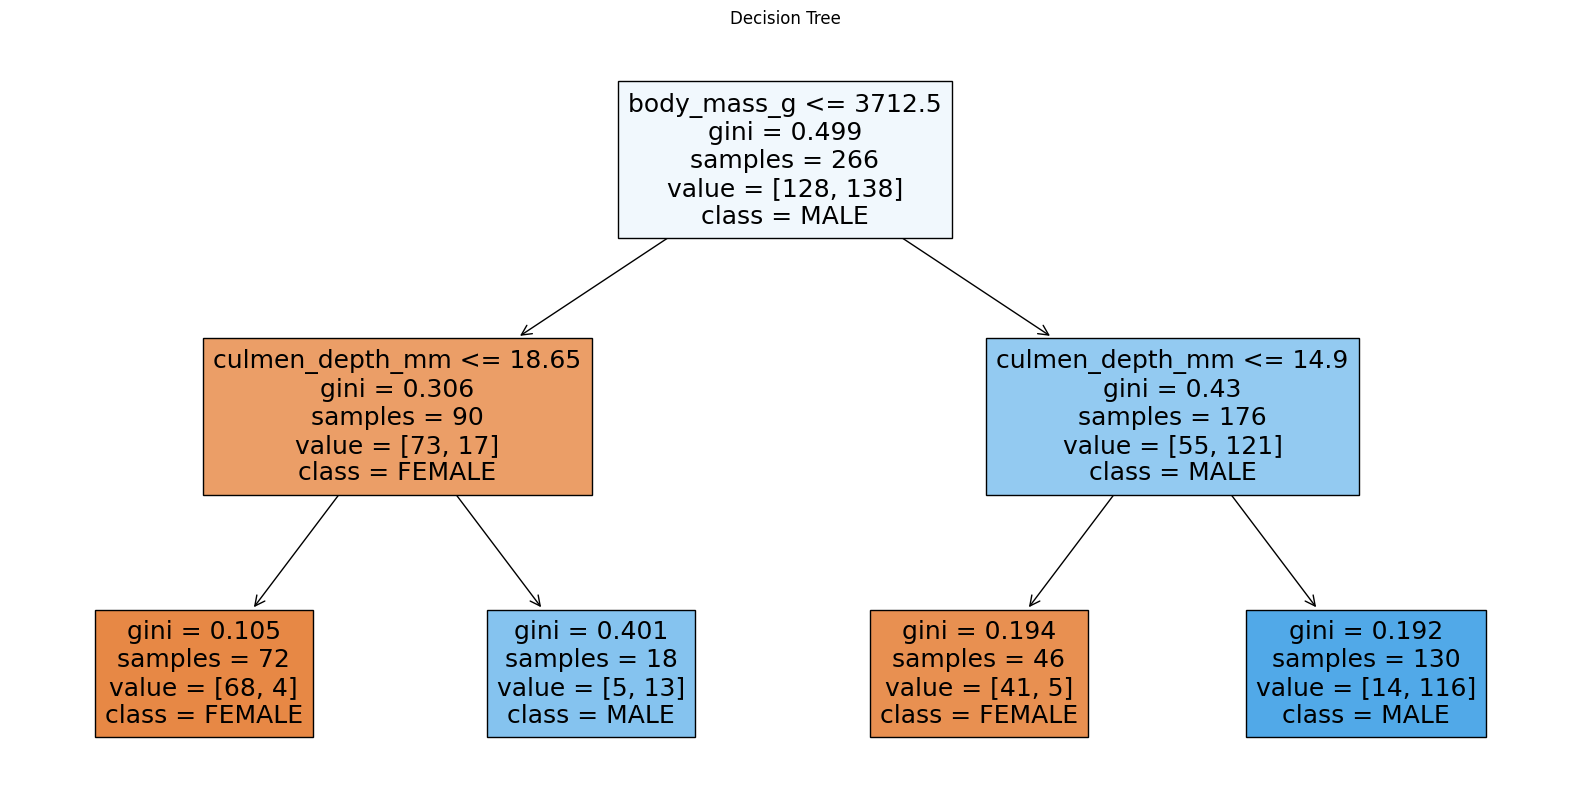

In [350]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=class_names, filled=True)
plt.title('Decision Tree')
plt.show()

### Post-hoc explainable modellen - Deep learning en feature permutation

In plaats van een beslisboom gebruiken wij nu een deep learning model. Hieronder wordt het model gebouwd en kijken we naar de accuracy van het model op de test data. Hoe verschilt het resultaat met de beslisboom?

In [351]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Further prepare the data
scaler = StandardScaler()
X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test_norm = (X_test - X_train.min()) / (X_train.max() - X_train.min())

# Train model
model_deep = MLPClassifier(hidden_layer_sizes=(60, 60), alpha=0.01, learning_rate_init=0.1, solver='adam', random_state=42, max_iter=200)
model_deep.fit(X_train_norm, y_train)

# Get the baseline accuracy on the test set
baseline_accuracy = accuracy_score(y_test, model_deep.predict(X_test_norm))
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline Accuracy: 0.9104477611940298


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


We gaan nu kijken welke features belangrijk zijn volgens ons deep learning model. Dit doen wij door de waardes van features te verstoren en te kijken naar het verschil in de kwaliteit van de voorspellingen.

Als wij de waardes van een feature in de dataset verstoren en de voorspelling blijft vrijwel hetzelfde, betekend dit dat het model deze feature nauwelijks nodig is. Als de voorspelling erg verandert is de feature erg belangrijk voor het model.

Hier onder zien wij de waardes van de oorspronkelijke features.

In [352]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
30,39.5,16.7,178.0,3250.0
317,46.9,14.6,222.0,4875.0
79,42.1,19.1,195.0,4000.0
201,49.8,17.3,198.0,3675.0
63,41.1,18.2,192.0,4050.0
...,...,...,...,...
288,43.5,14.2,220.0,4700.0
4,36.7,19.3,193.0,3450.0
83,35.1,19.4,193.0,4200.0
319,51.1,16.5,225.0,5250.0


Nu verstoren we de culmen_length_mm feature.

In [353]:
X_permuted = X_test.copy()
X_permuted['culmen_length_mm'] = np.random.permutation(X_permuted['culmen_length_mm'])
X_permuted

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
30,46.8,16.7,178.0,3250.0
317,47.6,14.6,222.0,4875.0
79,49.6,19.1,195.0,4000.0
201,35.7,17.3,198.0,3675.0
63,41.3,18.2,192.0,4050.0
...,...,...,...,...
288,43.2,14.2,220.0,4700.0
4,35.0,19.3,193.0,3450.0
83,50.8,19.4,193.0,4200.0
319,36.8,16.5,225.0,5250.0


We passen het model toe op de verstoorde data en bekijken de prestatie (accuracy) van het model.

In [354]:
# Get the new accuracy on the test set
permuted_accuracy = accuracy_score(y_test, model_deep.predict(X_permuted))
print(f'Permuted Accuracy: {permuted_accuracy}')

Permuted Accuracy: 0.44776119402985076


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Wat kunnen wij nu zeggen over de belang van de snavellengte (=culmen_length)?

Hier onder staat een stuk code dat automatisch één voor één de features verstoord en per keer kijkt naar het effect op de prestatie van het model. De nieuwe prestatie wordt vergeleken met de oorspronkelijke prestatie van het model. De grootte van het verschil wordt gezien als de 'importance' van de feature.

In [355]:
# Function to calculate permutation feature importance
def permutation_importance(model, X_test, y_test, metric):
    baseline_score = metric(y_test, model.predict(X_test))
    importances = {}

    for col in X_test.columns:
        # Shuffle the values in the column
        X_permuted = X_test.copy()
        X_permuted[col] = np.random.permutation(X_permuted[col])
        
        # Calculate the model performance with the permuted feature
        permuted_score = metric(y_test, model.predict(X_permuted))
        
        # The importance is the decrease in performance
        importances[col] = baseline_score - permuted_score
    return importances

We gebruiken deze functie nu om het belang van alle features te visualiseren.

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

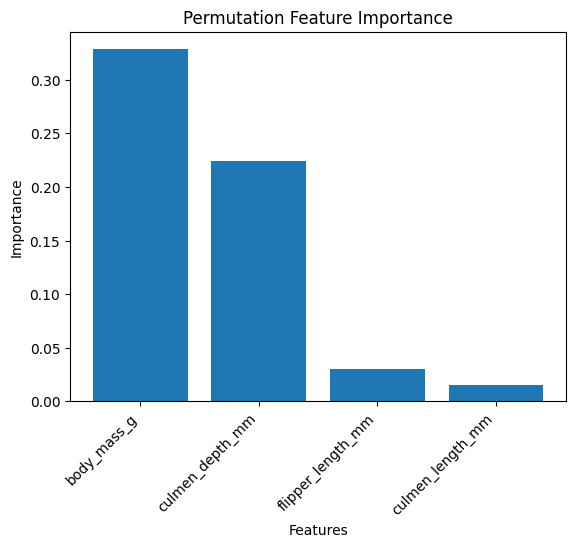

In [356]:
# Calculate the feature importances
importances = permutation_importance(model_deep, X_test_norm, y_test, accuracy_score)

# Sort importances
sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))

# Plot the importances
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.show()

Wat kunnen we zeggen over de verschillende features?

### Lokale uitleg

De feature permutation methode waar we de features veranderen en kijken hoe dat de model prestatie beïnvloed vertelt ons iets over de globale werking van het model.

In sommige situaties kan het gewenst zijn dat we niet alleen deze globale uitleg hebben, maar ook specifieke voorspellingen uit kunnen leggen. Wat we dan willen is de voorspelling + de redenatie voor deze voorspelling.

In dit voorbeeld gaan wij kijken naar SHAP (SHapley Additive exPlanations). Dit is een van de populairste methodes voor explainable AI. We gaan tijdens deze workshop niet in op hoe dit precies werkt, voor meer informatie zie: https://github.com/shap/shap#citations.

We genereren een SHAP 'explainer' voor ons deep learning model en de dataset.

In [357]:
import shap

shap.initjs()
explainer = shap.KernelExplainer(model_deep.predict_proba, np.asarray(X_train_norm))

Using 266 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


We hebben onze dataset, wij selecteren één penguin waarvan wij willen voorspellen of het een mannetje of vrouwtje is.

In [358]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
30,39.5,16.7,178.0,3250.0
317,46.9,14.6,222.0,4875.0
79,42.1,19.1,195.0,4000.0
201,49.8,17.3,198.0,3675.0
63,41.1,18.2,192.0,4050.0
...,...,...,...,...
288,43.5,14.2,220.0,4700.0
4,36.7,19.3,193.0,3450.0
83,35.1,19.4,193.0,4200.0
319,51.1,16.5,225.0,5250.0


Nadat we penguin 317 hebben geselecteerd, stoppen wij de data in het model en genereren een voorspelling met uitleg.

Het idee van de SHAP values is dat de rood/roze features de voorspelling zoals hij is ondersteunen. De features in het blauw wijzen er juist op dat de voorspelling anders zou moeten zijn. De grootte van de balkjes laat zien hoeveel het model gebruik maakt van het bewijs dat elk van de verschillende features levert.

In dit geval geven de features culmen_length_mm, culmen_depth_mm en body_mass_g allemaal aan dat de penguin een ... is, terwijl de flipper_length_mm van deze penguin dit in twijfel kan brengen.

Pas het id van de penguin (317) aan om naar de voorspelling en uitleg van andere penguins te kijken.

Wat kun je uit de uitleg halen?

In [359]:
my_sample = X_test_norm.loc[12]

my_sample_df = pd.DataFrame(my_sample).T
my_sample_df.columns = X_test_norm.columns
print('Predicted sex:', model_deep.predict(my_sample_df)[0])

shap_values = explainer.shap_values(my_sample)
shap.force_plot(explainer.expected_value[0], shap_values[0], my_sample)

Predicted sex: FEMALE


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
